# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from urllib.request import urlretrieve

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo_df = pd.read_csv('../../../data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [4]:
chipo_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

Text(0, 0.5, 'Quantity Ordered')

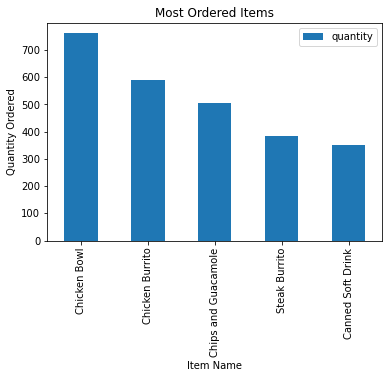

In [9]:
top_5_bought = chipo_df[['item_name', 'quantity']].groupby('item_name').sum().sort_values('quantity', ascending=False).head(5)
top_5_bought.plot(kind='bar')
plt.title('Most Ordered Items')
plt.xlabel('Item Name')
plt.ylabel('Quantity Ordered')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [6]:
# Convert Price column data type
replace = lambda price: price.str[1:]
chipo_df['item_price'] = pd.to_numeric(replace(chipo_df.item_price), errors='coerce')

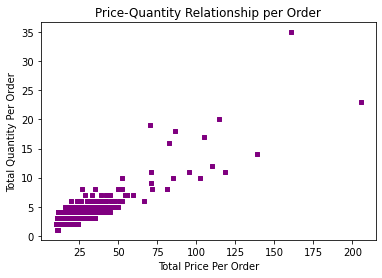

In [18]:
qty_price_per_order = chipo_df[['order_id', 'quantity', 'item_price']].groupby('order_id').sum()
plt.scatter(x=qty_price_per_order.item_price, y=qty_price_per_order.quantity, marker='s', s=20, c='purple')
plt.title('Price-Quantity Relationship per Order')
plt.xlabel('Total Price Per Order')
plt.ylabel('Total Quantity Per Order');